# Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Invocación de los datos

In [2]:
dataframe = pd.read_excel("CREDITRISK_RAW_WithoutTarget.xlsx", index_col='ID')
dataframe.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval
ID,,,,,,,,,,,,,,,,,,
1,F,463000.0,55.0,MED,CAS,27,226,CONCEPCION,0,-4030,0.0,292673,142.0,0,81,1,18,NO
2,F,1200000.0,59.0,MED,CAS,121,226,CONCEPCION,0,0,27797549.0,0,16.0,0,34519,1,60,NO
3,F,526000.0,49.0,TEC,SEP,59,88,SANTIAGO,0,750000,0.0,0,0.0,0,8016,0,14,NO
4,M,1500000.0,47.0,UNV,SEP,138,1,ARICA,0,976444,0.0,0,13.0,10,25323,1,66,NO
5,M,2600000.0,41.0,UNV,CAS,60,291,PUERTO MONTT,0,115440,0.0,4500000,7960.0,14,4566,3,77,SI


# Descripción de los datos

In [3]:
dataframe.describe()

,RENTA,EDAD,COD_OFI,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas
count,2.284000e+03,2292.00000,2294.000000,2.294000e+03,2.294000e+03,2.282000e+03,2.294000e+03,2288.000000,2294.000000,2294.000000,2294.000000,2294.000000
mean,1.738313e+06,43.59075,68.941587,3.018981e+05,5.321097e+05,2.450802e+05,3.874473e+05,1099.773601,7.207062,3958.702267,1.236269,34.773758
std,2.265127e+06,8.11189,40.207411,8.598597e+05,6.546258e+05,1.828896e+06,1.255354e+06,1799.245209,15.210038,14491.329342,0.747125,22.804575
min,4.350000e+04,21.00000,0.000000,0.000000e+00,-1.033096e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000
25%,5.000000e+05,38.00000,31.000000,0.000000e+00,7.336000e+04,0.000000e+00,0.000000e+00,21.000000,0.000000,0.000000,1.000000,17.000000
50%,8.000000e+05,44.00000,59.000000,0.000000e+00,3.500000e+05,0.000000e+00,3.958500e+04,401.000000,0.000000,255.000000,1.000000,27.000000
75%,1.600000e+06,50.00000,92.000000,0.000000e+00,7.500000e+05,0.000000e+00,4.676675e+05,1411.250000,6.000000,1326.500000,2.000000,48.000000
max,9.940000e+06,64.00000,155.000000,1.022472e+07,6.923740e+06,3.337417e+07,5.000000e+07,19404.000000,134.000000,262321.000000,3.000000,80.000000


# Descripción por categoría

In [4]:
print(dataframe.groupby('GENERO').size())

GENERO
F            936
M           1348
dtype: int64


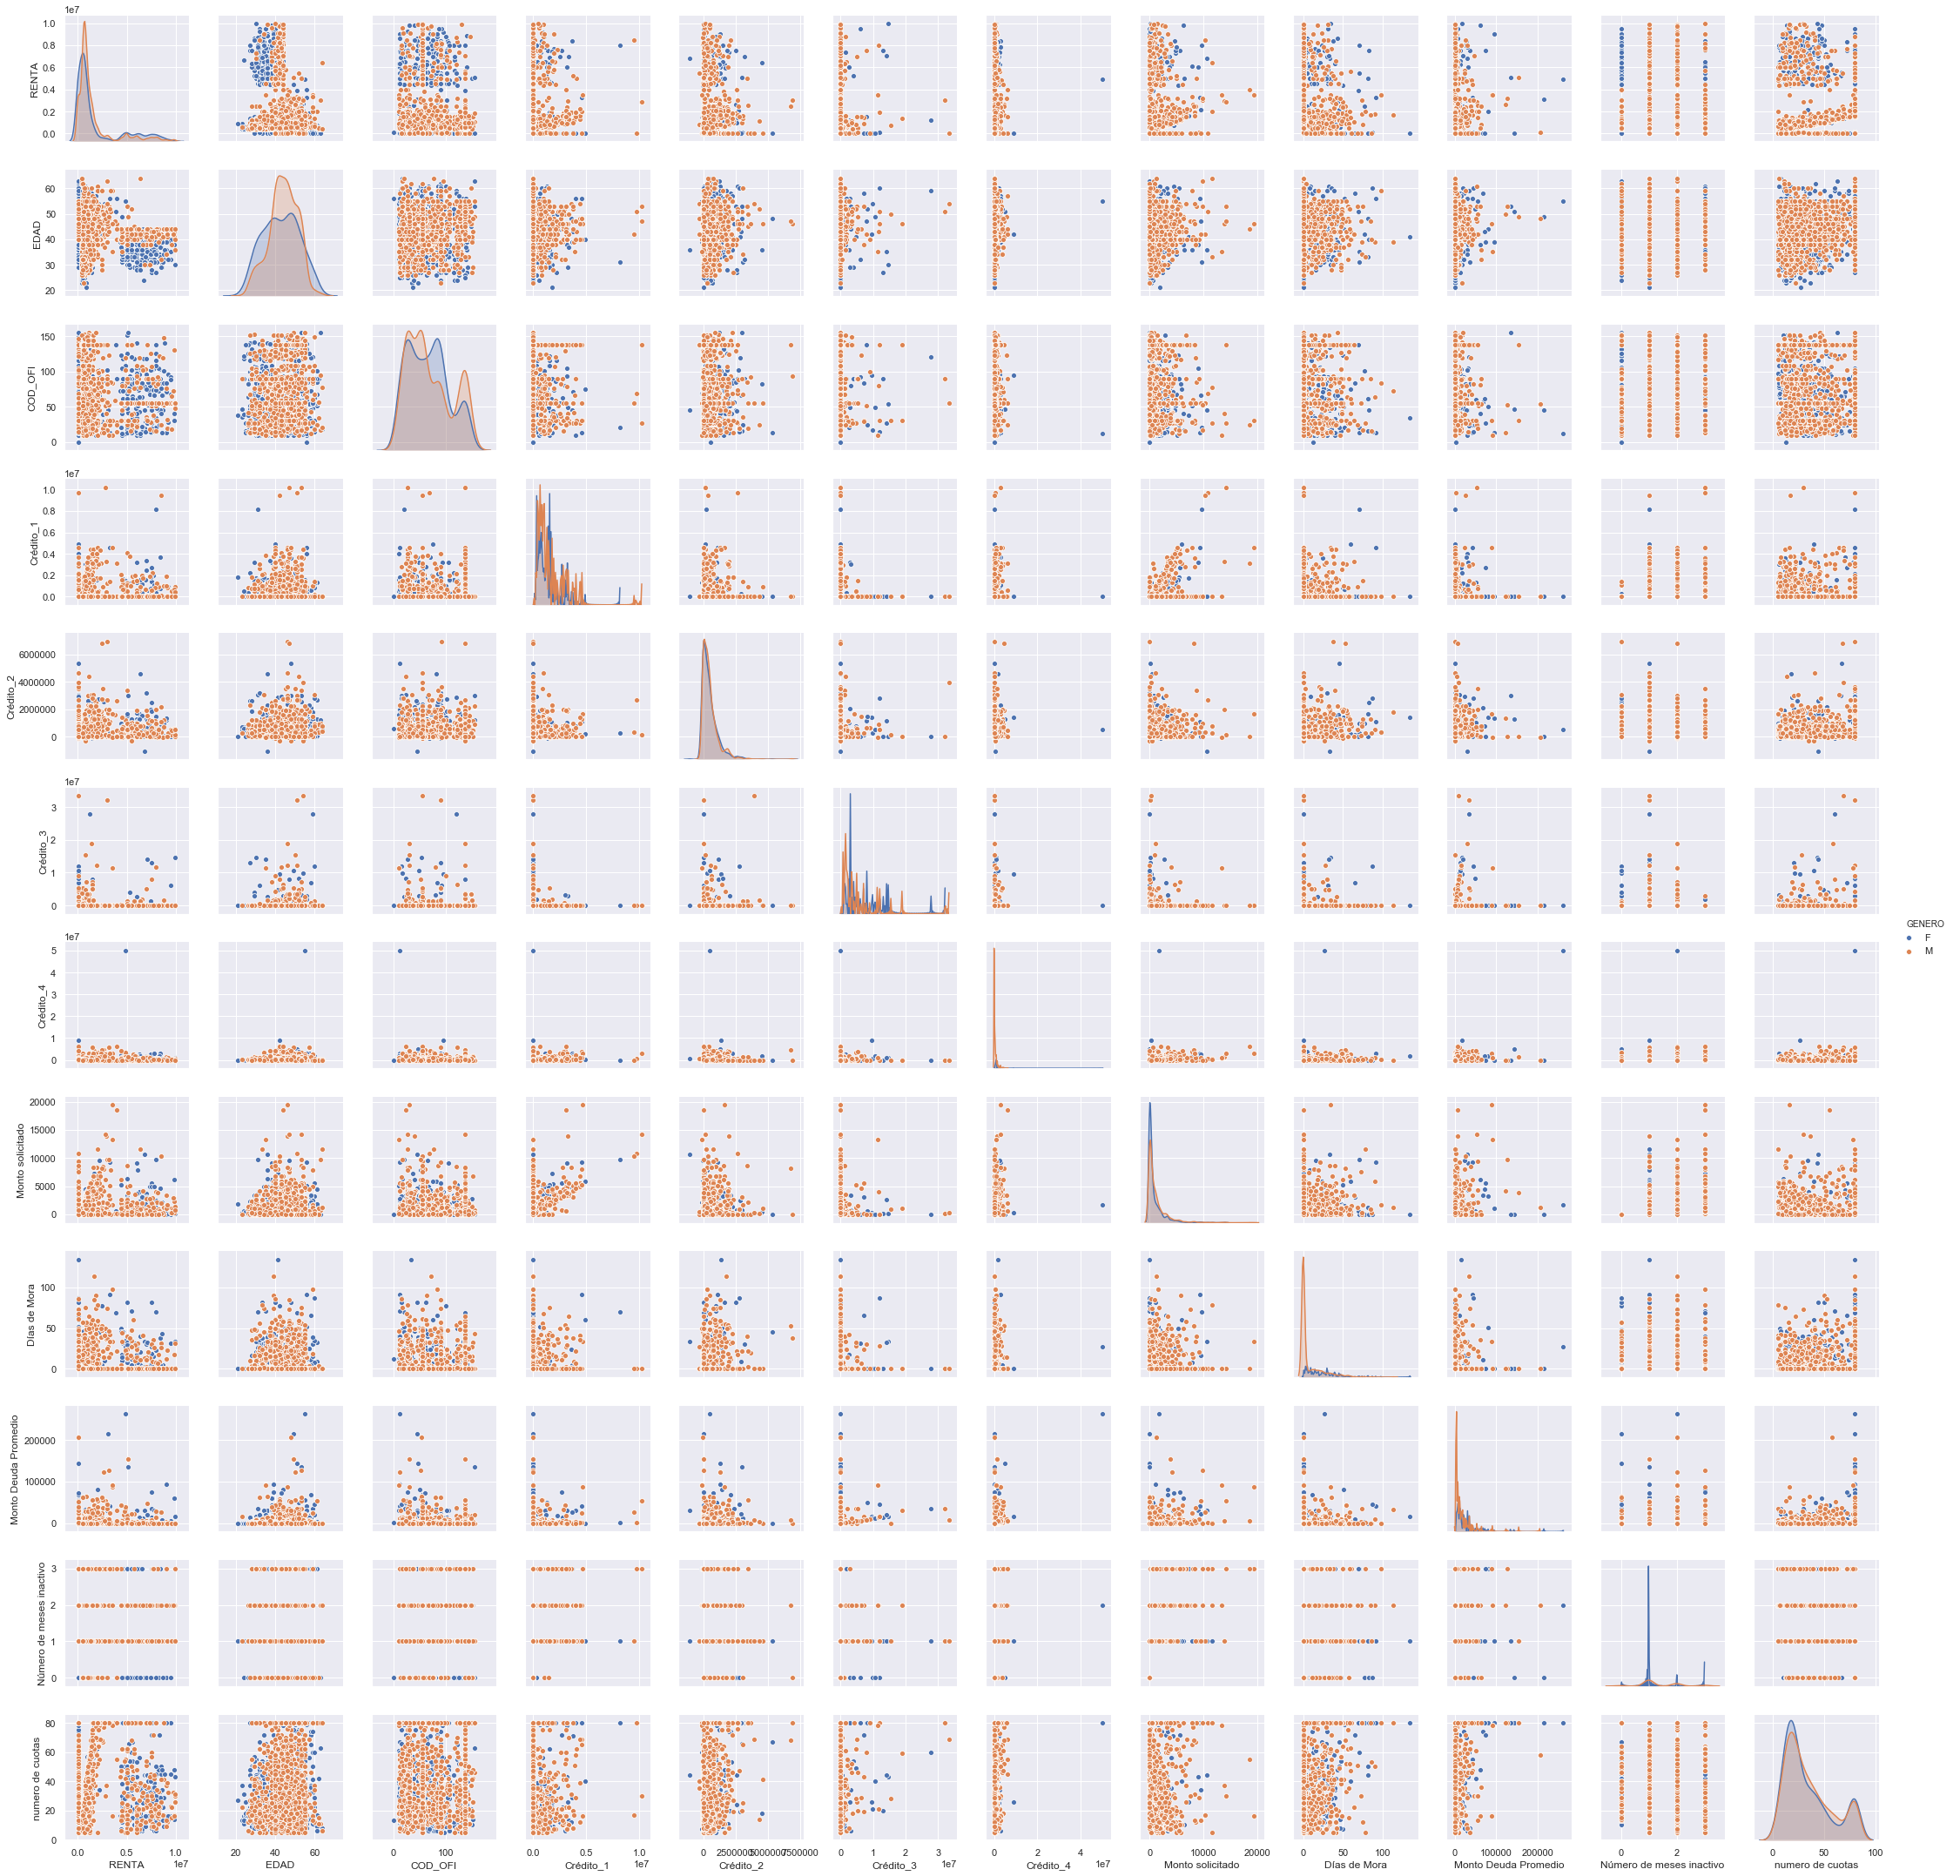

In [5]:
# Diagramas de dispersión
sns.set()
cols = ['RENTA','EDAD','Crédito_1','Crédito_2','Crédito_3','Crédito_4','Monto solicitado','Días de Mora','Monto Deuda Promedio','Número de meses inactivo','numero de cuotas']
sns.pairplot(dataframe.dropna(),hue='GENERO',kind='scatter')
plt.show();

In [6]:
def binario(data):
    if(data[0]=='F'):
        return 1
    else:
        return 0

In [7]:
df=dataframe.dropna()
#X = np.array(df[['RENTA','Monto Deuda Promedio','Monto solicitado','Días de Mora']])
X = np.array(df[['RENTA','Monto Deuda Promedio','Monto solicitado','Días de Mora']])
y = np.array(df['GENERO'].apply(binario))
X.shape

(2240, 4)

In [8]:
1 in y

True

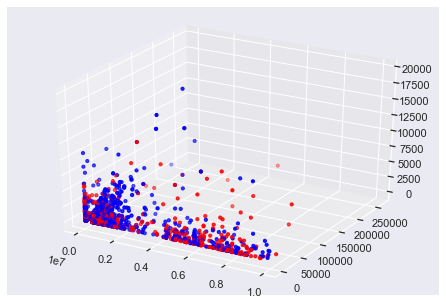

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0],X[:, 1], X[:, 2], c=asignar,s=10)


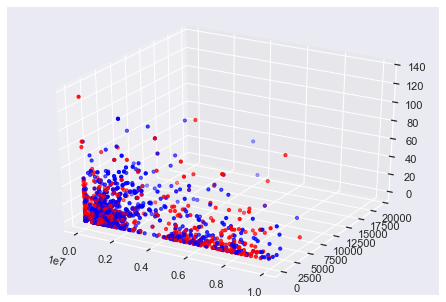

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0],X[:, 2], X[:, 3], c=asignar,s=10)

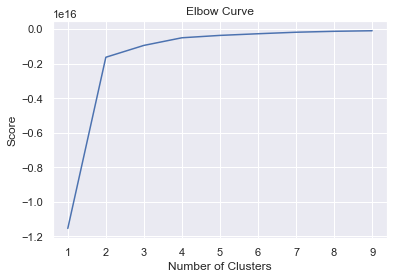

In [11]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Análisis de Clusters

In [12]:
kmeans = KMeans(n_clusters=2).fit(X) #Se elige 2 por elbow
centroids = kmeans.cluster_centers_
print(centroids)

[[8.17956686e+05 3.74366383e+03 1.08607672e+03 7.18273841e+00]
 [6.52401377e+06 5.26509091e+03 1.19212672e+03 6.98898072e+00]]


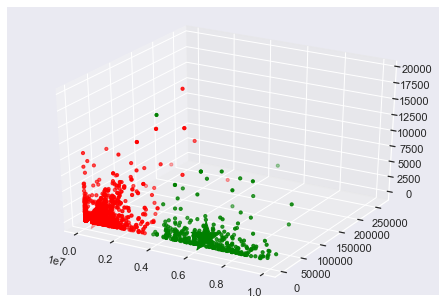

In [13]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=10)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

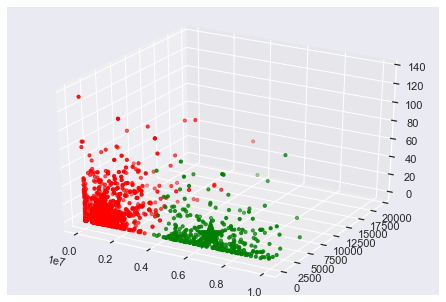

In [15]:
colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 2], X[:, 3], c=asignar,s=10)
ax.scatter(C[:, 0], C[:, 2], C[:, 3], marker='*', c=colores, s=1000)

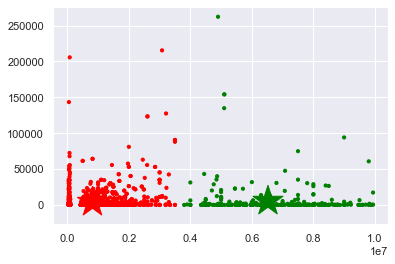

In [16]:
# Getting the values and plotting it
f1 = df['RENTA'].values
f2 = df['Monto Deuda Promedio'].values
 #'RENTA','Monto Deuda Promedio','Monto solicitado','Días de Mora'
plt.scatter(f1, f2, c=asignar, s=10)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

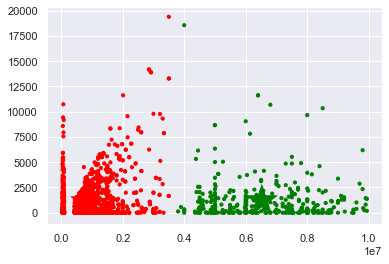

In [18]:
# Getting the values and plotting it
f1 = df['RENTA'].values
f2 = df['Monto solicitado'].values
 
plt.scatter(f1, f2, c=asignar, s=10)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

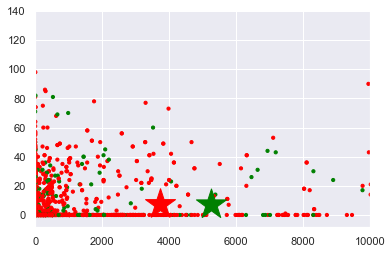

In [24]:
f1 = df['Monto Deuda Promedio'].values
f2 = df['Días de Mora'].values
 
plt.scatter(f1, f2, c=asignar, s=10)
plt.scatter(C[:, 1], C[:, 3], marker='*', c=colores, s=1000)
plt.xlim(0,10000)
plt.show()

In [ ]:
f1 = df['Monto Deuda Promedio'].values
f2 = df['Monto solicitado'].values
 
plt.scatter(f1, f2, c=asignar, s=10)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [38]:
copy =  pd.DataFrame()
copy['ID']=df.index
copy['NIV_EDUC']=df['NIV_EDUC'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,1877
1,green,363


In [36]:
df.iloc[:]['NIV_EDUC'].unique()

array(['MED     ', 'TEC     ', 'UNV     ', '        ', 'EUN     ',
       'BAS     '], dtype=object)

In [61]:
group_referrer_index = copy['label'] == 1 #Green
group_referrals = copy[group_referrer_index]
print(group_referrals.groupby('NIV_EDUC').size())

NIV_EDUC
              2
BAS           1
EUN           4
MED          64
TEC         156
UNV         136
dtype: int64


In [60]:
group_referrer_index = copy['label'] == 0 #Red
group_referrals = copy[group_referrer_index]
print(group_referrals.groupby('NIV_EDUC').size())

NIV_EDUC
             12
BAS           7
EUN           8
MED         570
TEC         541
UNV         739
dtype: int64


In [62]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([242, 589], dtype=int64)

# Clasificación de nuevas observaciones

In [65]:
X_new = np.array([[3500000,2000,5000,3]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


### Dado los features seleccionados, se nota que el modelo divide, casi independientemente, entre las rentas de los usuarios, por lo que el model finalmente separa entre usuarios con mayor o menor renta (0.4e+7 aprox), por lo que al parecer esta seleccion de atributos no es óptima para discernir entre un buen o mal pagador, ya que la renta no necesariamente va a ser el unico factor importante.